In [1]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

/home/nekozo/anaconda3/envs/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


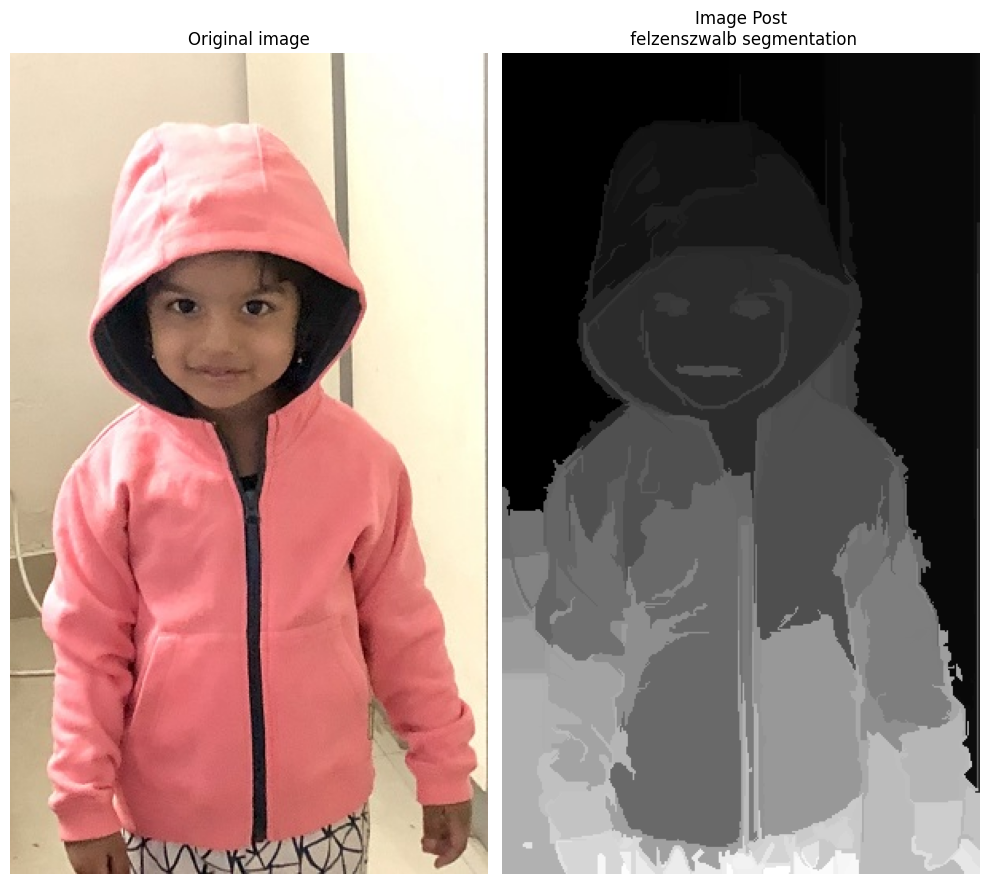

In [3]:
img = read('girl.jpg', 1)
segments_fz = felzenszwalb(img, scale=200)

subplots([img,segments_fz], titles=['Original image', 'Image Post\n felzenszwalb segmentation'], figsize=(10,10), nc=2)

/home/nekozo/anaconda3/envs/pytorch/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


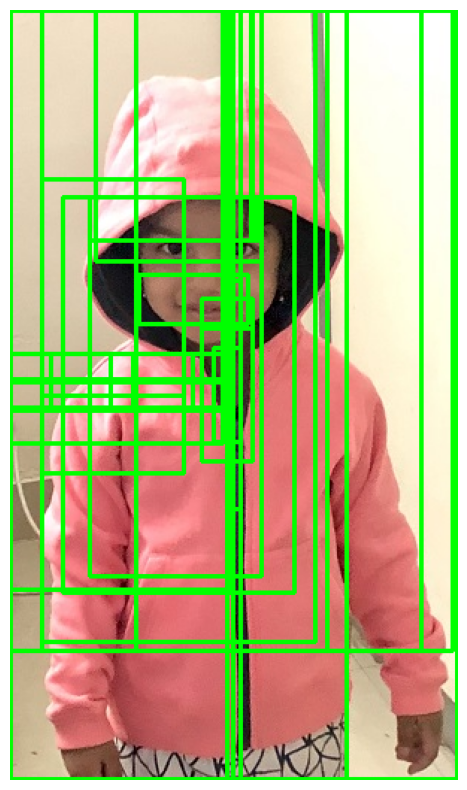

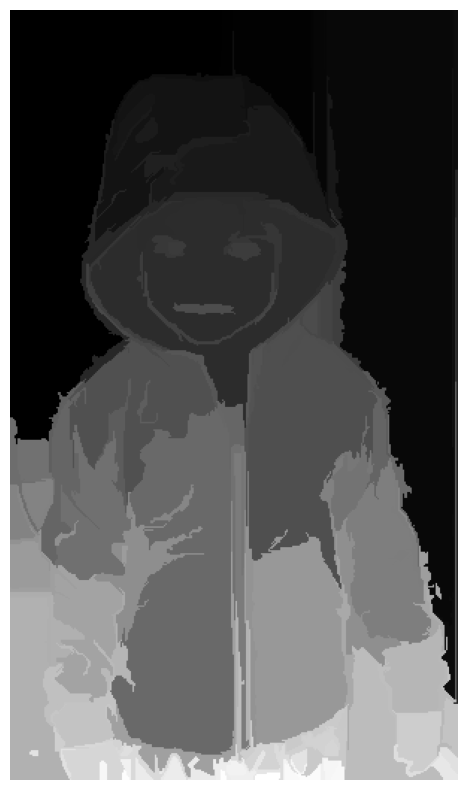

In [7]:
def extract_endicates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] not in candidates and r['size'] > (0.05*img_area) and r['size'] < (1 * img_area):
            x, y, w, h = r['rect']
            candidates.append(list(r['rect']))
    return candidates

candidates = extract_endicates(img)
show(img, bbs=candidates)
show(segments_fz)